In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
all_data = pd.read_pickle('./data/no_singletons_data.pkl')
print(all_data)

                   Team       Opponent  Diff     Tm    Opp
0     Abilene Christian   Grand Canyon  -4.0  143.0  147.0
1     Abilene Christian        NCState -20.0   64.0   84.0
2     Abilene Christian     Western Ky  -2.0   84.0   86.0
4             Air Force       Boise St -69.0  104.0  173.0
5             Air Force    Colorado St -18.0  142.0  160.0
...                 ...            ...   ...    ...    ...
1585         Washington  Washington St   3.0  161.0  158.0
1586        Weber State           Yale  10.0   75.0   65.0
1587   Western Illinois      Wisconsin -22.0   49.0   71.0
1588         Western Ky  Wichita State -10.0   61.0   71.0
1589         Western Ky   Wright State   7.0   91.0   84.0

[1496 rows x 5 columns]


346


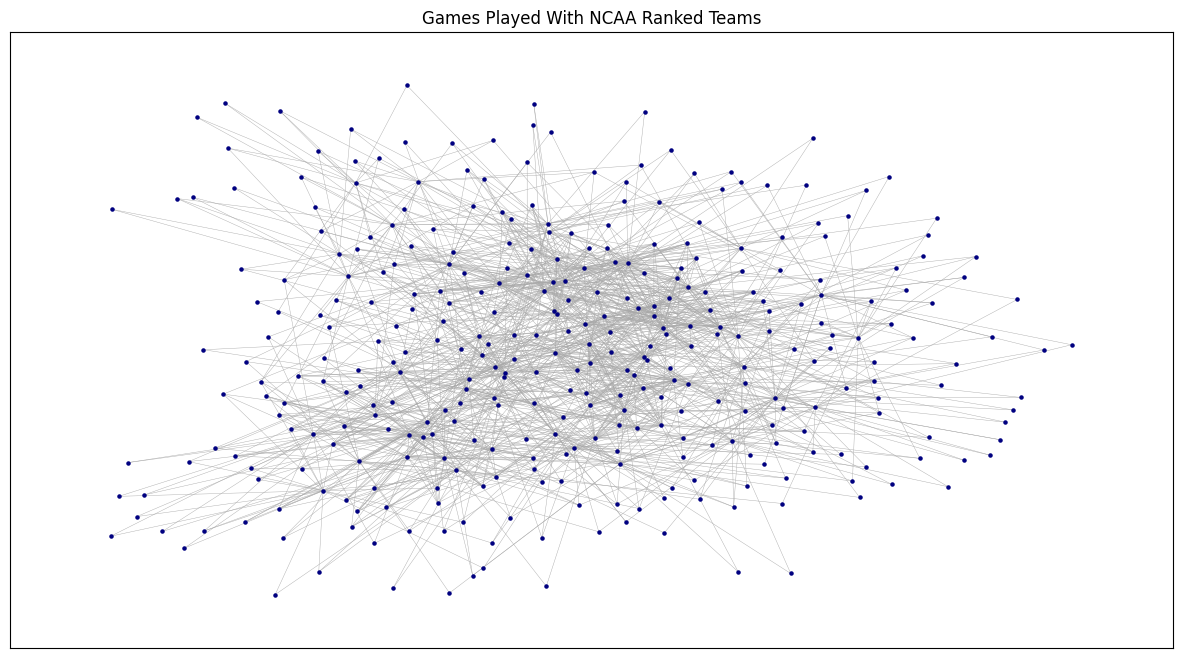

Node Abilene Christian: Degree 3
Node Grand Canyon: Degree 23
Node NCState: Degree 29
Node Western Ky: Degree 20
Node Air Force: Degree 6
Node Boise St: Degree 22
Node Colorado St: Degree 23
Node Nevada: Degree 27
Node New Mexico: Degree 26
Node San Diego State: Degree 30
Node Utah St: Degree 23
Node Akron: Degree 23
Node Bowling Green State: Degree 3
Node Bradley: Degree 6
Node Buffalo: Degree 3
Node Central Michigan: Degree 3
Node Creighton: Degree 27
Node Drake: Degree 22
Node Eastern Michigan: Degree 3
Node Florida International: Degree 4
Node Gardner-Webb: Degree 5
Node James Madison: Degree 26
Node Kent State: Degree 6
Node Miami: Degree 9
Node Nevada-Las Vegas: Degree 10
Node Northern Illinois: Degree 3
Node Northern Kentucky: Degree 3
Node South Dakota St: Degree 20
Node South Dakota State: Degree 3
Node Southern Mississippi: Degree 5
Node St. Bonaventure: Degree 6
Node Toledo: Degree 4
Node Utah State: Degree 8
Node Western Michigan: Degree 2
Node Alabama: Degree 35
Node Arizo

In [64]:
plt.figure(figsize=(15, 8)) # Width and height in inches

G = nx.Graph()

# Add nodes and edges
for index, row in all_data.iterrows():
    G.add_edge(row['Team'], row['Opponent'])

# Define the position of nodes
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='navy')

print(len(G.nodes))

# Draw edges with labels (weights)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width = 0.3, edge_color='darkgray')

# edge_labels = {(u, v): d['weight'] for u, v, d in edges}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Display the graph
plt.title('Games Played With NCAA Ranked Teams')
plt.show()

# Get the degree of each node 
node_degrees = G.degree() 
# Print the node names with their respective degrees 
for node, degree in node_degrees: 
    print(f"Node {node}: Degree {degree}")

219


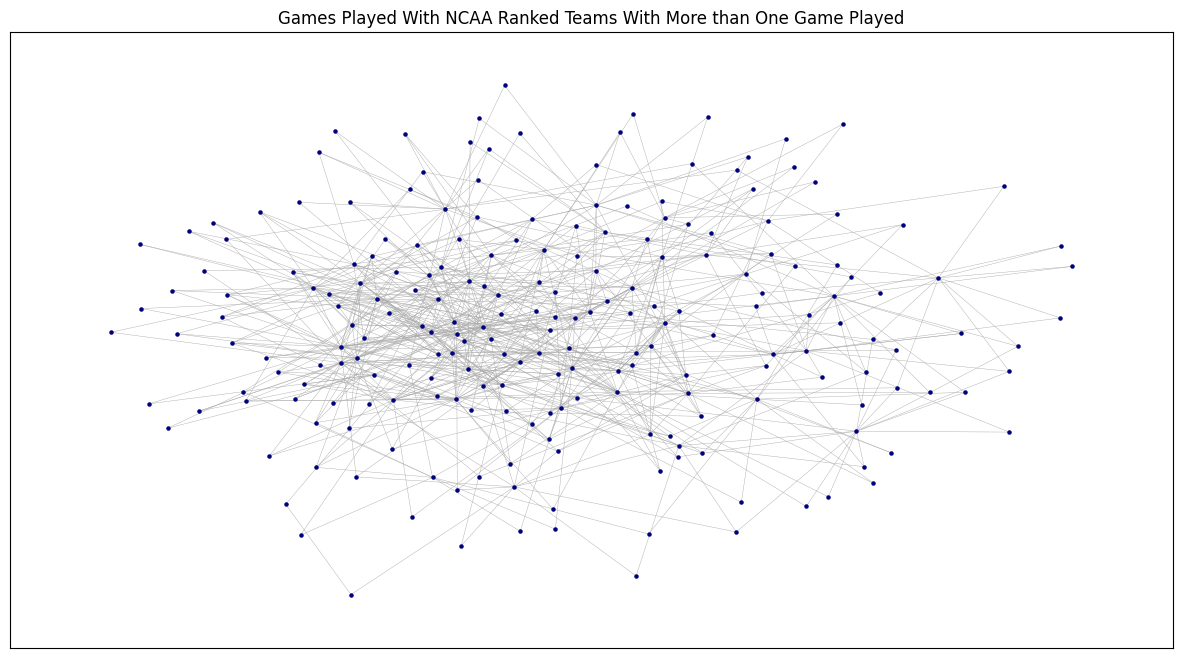

In [23]:
plt.figure(figsize=(15, 8)) # Width and height in inches

G = nx.Graph()

# Add nodes and edges
for index, row in all_data.iterrows():
    G.add_edge(row['Team'], row['Opponent'])

nodes_with_one_connection = [node for node in G.nodes() if G.degree(node) <= 1]
G.remove_nodes_from(nodes_with_one_connection)


# Define the position of nodes
pos = nx.spring_layout(G)


# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='navy')

print(len(G.nodes))

# Draw edges with labels (weights)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width = 0.3, edge_color='darkgray')

# edge_labels = {(u, v): d['weight'] for u, v, d in edges}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Display the graph
plt.title('Games Played With NCAA Ranked Teams With More than One Game Played')
plt.show()




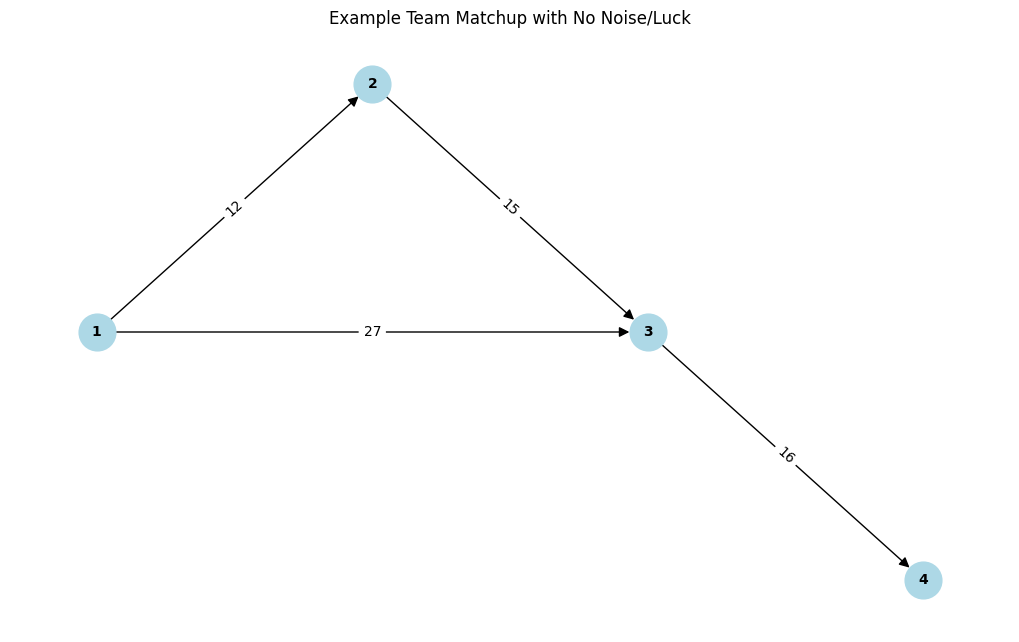

In [36]:
plt.figure(figsize=(10,6))
# Create a directed graph (DAG)
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2, 12), (1, 3, 27), (2, 3, 15), (3, 4, 16)])

# Manually specify the position of each node
pos = {
    1: (0, 1),
    2: (1, 2),
    3: (2, 1),
    4: (3, 0)
}

# Draw and display the graph with specified positions
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=15)

# Draw edge labels (weights) 
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Example Team Matchup with No Noise/Luck")
plt.show()


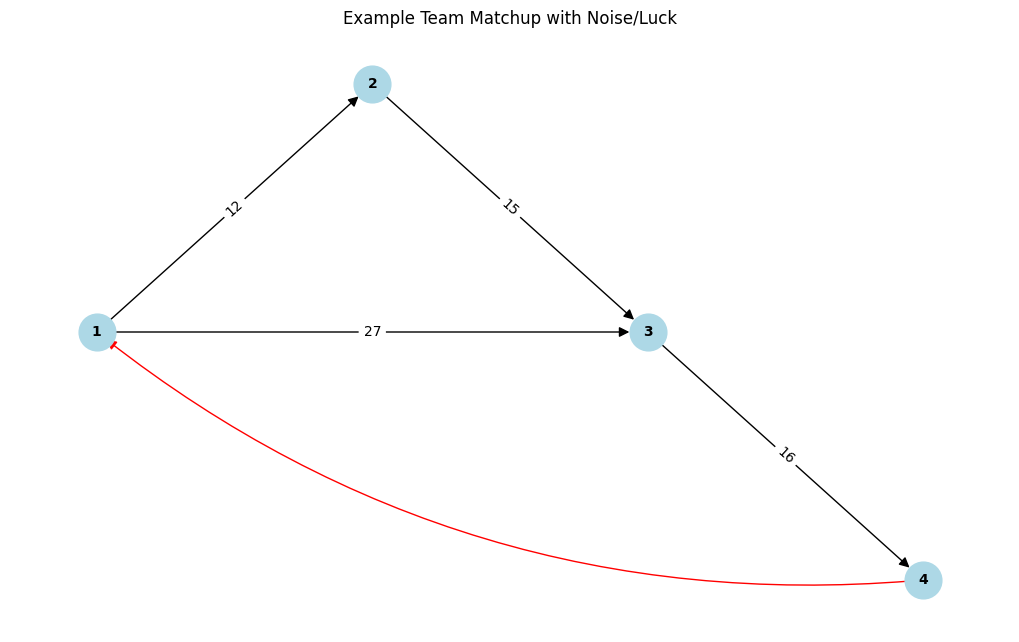

In [51]:
plt.figure(figsize=(10,6))
# Create a directed graph (DAG)
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2, 12), (1, 3, 27), (2, 3, 15), (3, 4, 16)])

# Manually specify the position of each node
pos = {
    1: (0, 1),
    2: (1, 2),
    3: (2, 1),
    4: (3, 0),
}

# Draw and display the graph with specified positions
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=15)

nx.draw_networkx_edges(G, pos, edgelist=[(4, 1, 20)], edge_color='red', connectionstyle='arc3,rad=-0.2', arrows=True, arrowstyle='-|>', arrowsize=15)


# Draw edge labels (weights) 
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



plt.title("Example Team Matchup with Noise/Luck")
plt.show()
